In [403]:
#data manipulation
import numpy as np
import pandas as pd

In [404]:
#data visualization
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [405]:
#the statistical analysis 
from scipy import stats 
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

In [406]:
#machine learning 
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    StratifiedKFold
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble  import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)

#to evaluate the model
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve
)

from sklearn.model_selection import GridSearchCV

In [407]:
#utilities 
import warnings
warnings.filterwarnings ('ignore')

In [408]:
#set random seed for reproducibility
RANDOM_STATE = 63
np.random.seed(RANDOM_STATE)

In [409]:
#visualization 
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] =(12, 8)
plt.rcParams ['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10 

In [441]:
#task1: loading and cleaning the data 
print ("\n" + "=" *55)
print (" Task 1: Data loading and preparation".center (55))
print ("=" *55)
# 1.1 load the dataset
print("\n1.1 Loading dataset" )
ped_df = pd.read_csv('C:\\Users\\pc\\Documents\\Python project\\archive\\pharyngitis.csv')
print(f" Dataset shape: {ped_df.shape[0]} rows × {ped_df.shape[1]}columns") 


          Task 1: Data loading and preparation         

1.1 Loading dataset
 Dataset shape: 676 rows × 20columns


In [442]:
# 1.2 Data overview 
print("\n1.2 Dataset overview ")
print ("-" *55)
#Display first few rows 
print("\nFirst 5 records :")
print(ped_df.head())


1.2 Dataset overview 
-------------------------------------------------------

First 5 records :
   number  age_y  radt  pain  swollenadp  tender  tonsillarswelling  exudate  \
0    2000    7.0     0   1.0         1.0     0.0                0.0      0.0   
1    2001   11.7     1   1.0         1.0     0.0                0.0      0.0   
2    2002    5.6     1   1.0         2.0     1.0                1.0      0.0   
3    2003    6.0     1   1.0         2.0     1.0                1.0      0.0   
4    2004    5.2     0   1.0         2.0     0.0                1.0      0.0   

   temperature  sudden  cough  rhinorrhea  conjunctivitis  headache  erythema  \
0         37.0     1.0    1.0         0.0             0.0       0.0       1.0   
1         38.0     1.0    0.0         0.0             0.0       0.0       1.0   
2         37.0     1.0    0.0         1.0             1.0       0.0       1.0   
3         40.8     1.0    0.0         1.0             0.0       0.0       1.0   
4         40.0  

In [443]:
print("\nDataset information: ")
print(ped_df.info())


Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             676 non-null    int64  
 1   age_y              676 non-null    float64
 2   radt               676 non-null    int64  
 3   pain               644 non-null    float64
 4   swollenadp         672 non-null    float64
 5   tender             648 non-null    float64
 6   tonsillarswelling  658 non-null    float64
 7   exudate            666 non-null    float64
 8   temperature        673 non-null    float64
 9   sudden             669 non-null    float64
 10  cough              664 non-null    float64
 11  rhinorrhea         673 non-null    float64
 12  conjunctivitis     671 non-null    float64
 13  headache           662 non-null    float64
 14  erythema           672 non-null    float64
 15  petechiae          634 non-null    float64
 16  abd

In [413]:
print("\nBasic statistics:")
print(ped_df.describe())


Basic statistics:
            number       age_y        radt        pain  swollenadp  \
count   676.000000  676.000000  676.000000  644.000000  672.000000   
mean   2586.340237    6.074260    0.451183    0.841615    0.989583   
std     431.962484    2.493206    0.497980    0.365386    0.968142   
min    2000.000000    3.000000    0.000000    0.000000    0.000000   
25%    2216.750000    4.200000    0.000000    1.000000    0.000000   
50%    2460.500000    5.400000    0.000000    1.000000    1.000000   
75%    3079.250000    7.200000    1.000000    1.000000    2.000000   
max    3289.000000   14.300000    1.000000    1.000000    3.000000   

           tender  tonsillarswelling     exudate  temperature      sudden  \
count  648.000000         658.000000  666.000000   673.000000  669.000000   
mean     0.202160           0.724924    0.216216    38.739970    0.802691   
std      0.401922           0.446892    0.411973     0.838184    0.398266   
min      0.000000           0.000000    0.

In [444]:
memory_usage = ped_df.memory_usage(deep=True).sum() / 1024**2
print (f"\nMemory usage: {memory_usage:.2f} MB")


Memory usage: 0.10 MB


In [446]:
print("\n1.3 Data quality assessment: ")
print ("-" *55)

#check for duplication 
n_duplicates = ped_df.duplicated().sum()
print(f"\nDuplicate records : {n_duplicates}")
if n_duplicates > 0: 
    print(f" warning!: Found {n_duplicates} duplicate records")
    print(" Duplicate rows will be removed ")

#check for missing values 
print("\nMissing values per column: ")
missing_data = ped_df.isnull().sum()
missing_percent = (missing_data / len(ped_df))* 100
missing_ped_df = pd.DataFrame({
    'Missing count': missing_data,
    'percentage' : missing_percent
})

print(missing_ped_df[missing_ped_df['Missing count'] > 0 ])

if missing_data.sum() == 0: 
    print(" No missing values found")

print("\nData types: ")
print(ped_df.dtypes)


1.3 Data quality assessment: 
-------------------------------------------------------

Duplicate records : 0

Missing values per column: 
                   Missing count  percentage
pain                          32    4.733728
swollenadp                     4    0.591716
tender                        28    4.142012
tonsillarswelling             18    2.662722
exudate                       10    1.479290
temperature                    3    0.443787
sudden                         7    1.035503
cough                         12    1.775148
rhinorrhea                     3    0.443787
conjunctivitis                 5    0.739645
headache                      14    2.071006
erythema                       4    0.591716
petechiae                     42    6.213018
abdopain                       9    1.331361
diarrhea                      13    1.923077
nauseavomit                   12    1.775148
scarlet                       10    1.479290

Data types: 
number                 int64
age_y   

In [447]:
#remove the number of the medical recoreds column
ped_df = ped_df.drop('number', axis=1)

In [448]:
# handel the missing values: we selected " drop the rows with missing values 
initial_rows = len(ped_df)
ped_df = ped_df.dropna()
rows_dropped = initial_rows - len(ped_df)
if rows_dropped > 0:
    print(f"Removed {rows_dropped} rows with missing values")
    print(f"The final dataset shape: {ped_df.shape}")
else:
    print("No rows with missing values")

Removed 164 rows with missing values
The final dataset shape: (512, 19)


In [449]:
#reset index after cleaning 
ped_df = ped_df.reset_index(drop=True)
print("\nData cleaning completed successfully")
print(f"The final dataset: {ped_df.shape[0]} rows × {ped_df.shape[1]} columns")


Data cleaning completed successfully
The final dataset: 512 rows × 19 columns


In [450]:
#task 2: descripitive statistics and EDA
print ("\n" + "=" *55)
print (" Task 2: Exploratory data analysis".center (55))
print ("=" *55)

print("\n2.1 Overall dataset statistics:")
print ("-" *55)

#numeric statistics summary
print(ped_df.describe().round(2))

#count for each binary/categorical symptom feature -frequency counts
symptom_cols = [ 'pain', 'swollenadp', 'tender', 'tonsillarswelling', 'exudate', 'sudden', 'cough', 
                'rhinorrhea', 'conjunctivitis', 'headache', 'erythema', 'petechiae', 'abdopain', 
                'diarrhea', 'nauseavomit', 'scarlet']

result_table = pd.DataFrame(columns=['Feature', 'Value', 'Count', 'Percentage'])

for col in binary_cols:
    counts = ped_df[col].value_counts(dropna=False)
    proportions = counts / len(ped_df)*100
    #add each value to the result table
    for val in counts.index:
        result_table = pd.concat([
            result_table,
            pd.DataFrame({
                'Feature':[col],
                'Value':[val],
                'Count':[counts[val]],
                'Percentage': [f"{proportions[val]:.2f}"]
            })
       ], ignore_index=True)
print(result_table)


            Task 2: Exploratory data analysis          

2.1 Overall dataset statistics:
-------------------------------------------------------
        age_y    radt    pain  swollenadp  tender  tonsillarswelling  exudate  \
count  512.00  512.00  512.00      512.00  512.00             512.00   512.00   
mean     6.25    0.45    0.85        0.94    0.21               0.71     0.21   
std      2.52    0.50    0.36        0.98    0.40               0.46     0.41   
min      3.00    0.00    0.00        0.00    0.00               0.00     0.00   
25%      4.40    0.00    1.00        0.00    0.00               0.00     0.00   
50%      5.50    0.00    1.00        1.00    0.00               1.00     0.00   
75%      7.52    1.00    1.00        2.00    0.00               1.00     0.00   
max     14.30    1.00    1.00        3.00    1.00               1.00     1.00   

       temperature  sudden   cough  rhinorrhea  conjunctivitis  headache  \
count       512.00   512.0  512.00      512.00  

In [451]:
#radt result distribution 
radt_distribution = ped_df['radt'].value_counts()
radt_percentage = (radt_distribution / len(ped_df)) * 100

print("\nRADT test results distribution: ")
print(f"Positive: {radt_distribution.get(1, 0)} ({radt_percentage.get(1, 0):.1f}%)")
print(f"Negative: {radt_distribution.get(0, 0)} ({radt_percentage.get(0, 0):.1f}%)")
print(f"Prevalence of GAS: {radt_percentage.get(1, 0):.1f}%")                                              


RADT test results distribution: 
Positive: 231 (45.1%)
Negative: 281 (54.9%)
Prevalence of GAS: 45.1%


In [452]:
#2.2 Age group analysis 
print("\n2.2 Age group VS RADT results analysis:")
print ("-" *55)

#create age group
age_bins = [0, 2, 5, 12, 18]
group_labels = ['Toddler (0-2)', 'Preschool (3-5)', 'School age (6-12)', 'Teen (13-18)']
#create a new column for age group 
ped_df['age_group'] = pd.cut(ped_df['age_y'],
                         bins=age_bins, labels=group_labels, right=True, include_lowest=True)
print(ped_df['age_group'].value_counts())


2.2 Age group VS RADT results analysis:
-------------------------------------------------------
age_group
School age (6-12)    283
Preschool (3-5)      210
Teen (13-18)          19
Toddler (0-2)          0
Name: count, dtype: int64


In [453]:
#calculate RADT positivity by age group 
ped_df['radt_positive'] = ped_df['radt']
age_radt_analysis = ped_df.groupby('age_group')['radt_positive'].agg([
    ('Total cases', 'count'),
    ('Positive cases', 'sum'),
    ('Positivity rate (%)', lambda x: (x.sum() / len(x)) * 100)
])    
print ("\nRADT positivity by age group:")
print(age_radt_analysis.round(2))


RADT positivity by age group:
                   Total cases  Positive cases  Positivity rate (%)
age_group                                                          
Toddler (0-2)                0               0                  NaN
Preschool (3-5)            210              84                40.00
School age (6-12)          283             139                49.12
Teen (13-18)                19               8                42.11


In [454]:
#statistical test:chi-square test
#H0 : RADT result is independent of age group
contingency_table = pd.crosstab(ped_df['age_group'], ped_df['radt_positive'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test for independence:")
print(f" X\u00B2 statistics :{chi2:.4f}")
print(f" p-value: {p_value:.4f}")
print(f" Degree of freedom: {dof}")
if p_value <0.05:
    print (f" Significant association between age group and RADT result ( p < 0.05 )")
else:
    print (f" No significant association found ( p >= 0.05 )")

age_positive = ped_df [ped_df['radt_positive'] ==1]['age_y']
age_negative = ped_df [ped_df['radt_positive'] ==0]['age_y']

t_stat, t_pvalue = ttest_ind(age_positive, age_negative)
print(f"\nAge comparison (positive VS negative ):")
print (f" Mean age (positive): {age_positive.mean():.2f} years ")
print(f" Mean age (negative): {age_negative.mean():.2f} years")
print(f" T-statistic: {t_stat:.4f}")
print(f" p-value: {t_pvalue:.4f}")



Chi-square test for independence:
 X² statistics :4.1185
 p-value: 0.1276
 Degree of freedom: 2
 No significant association found ( p >= 0.05 )

Age comparison (positive VS negative ):
 Mean age (positive): 6.34 years 
 Mean age (negative): 6.18 years
 T-statistic: 0.7190
 p-value: 0.4725


In [455]:
print ("\n2.3 Symptom correlation with RADT results:")
print ("-" *55)

#symptom_cols


#calculate correlation with RADT result 
correlations = ped_df[symptom_cols + ['radt_positive']].corr()['radt_positive'].drop('radt_positive')
correlations_sorted = correlations.sort_values(ascending=False)

print( "\nSymptoms correlations with RADT positive (sorted):")
for symptom, corr in correlations_sorted.items():
    direction = "Positive" if corr > 0 else "Negative"
    strength = ""
    if abs(corr) > 0.7: 
        strength = "Very strong"
    elif abs(corr) > 0.5:
        strength = "Strong"
    elif abs(corr) > 0.3:
        strength = "Moderate"
    else:
        strength = "Weak"
        print(f" {symptom:30s}: {corr:6.4f} ({strength} {direction})")

#the prevalence by RADT result 
print("\nSymptom prevalence by RADT results: ")
symptom_prev = ped_df.groupby('radt_positive')[symptom_cols].mean() * 100
print(symptom_prev.round(2))



2.3 Symptom correlation with RADT results:
-------------------------------------------------------

Symptoms correlations with RADT positive (sorted):
 scarlet                       : 0.2963 (Weak Positive)
 petechiae                     : 0.2684 (Weak Positive)
 tender                        : 0.1714 (Weak Positive)
 swollenadp                    : 0.1366 (Weak Positive)
 erythema                      : 0.0991 (Weak Positive)
 nauseavomit                   : 0.0620 (Weak Positive)
 sudden                        : 0.0507 (Weak Positive)
 tonsillarswelling             : 0.0403 (Weak Positive)
 headache                      : 0.0169 (Weak Positive)
 pain                          : 0.0130 (Weak Positive)
 abdopain                      : -0.0261 (Weak Negative)
 conjunctivitis                : -0.0465 (Weak Negative)
 exudate                       : -0.0467 (Weak Negative)
 diarrhea                      : -0.0613 (Weak Negative)
 rhinorrhea                    : -0.0663 (Weak Negative)
 co

In [456]:
#2.4 Patterns and trends 
print("\nPatterns and trends: ")
print ("-" *55)

print("\nMost common symptoms combination:") 
#create symptoms combinations 
ped_df['symptom_combo'] = ped_df[symptom_cols].astype(str).agg('-'.join, axis=1)
top_combos = ped_df['symptom_combo'].value_counts().head(10)
print(top_combos)

#multi-symptoms analysis
ped_df['symptom_count'] = ped_df[symptom_cols].sum(axis=1)
print(f"\nNumber of symptoms per patient:")
print(f" Mean: {ped_df['symptom_count'].mean():.2f}")
print(f" Median: {ped_df['symptom_count'].median():>2f}")
print(f" Range: {ped_df['symptom_count'].min():.0f} - {ped_df['symptom_count'].max():.0f}")

symptom_radt = ped_df.groupby('symptom_count')['radt_positive'].agg([
    'count', 'sum',
    ('positivity_rate', lambda x: x.sum() / len(x) *100)
])

print ("\nRADT positivity by number of symptoms: " )
print( symptom_radt.round(2))


Patterns and trends: 
-------------------------------------------------------

Most common symptoms combination:
symptom_combo
1.0-0.0-0.0-1.0-0.0-1.0-1.0-1.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-0.0    14
1.0-0.0-0.0-1.0-0.0-1.0-0.0-0.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-0.0    13
1.0-2.0-1.0-1.0-0.0-1.0-0.0-0.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-0.0     8
1.0-0.0-0.0-1.0-0.0-1.0-1.0-0.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-0.0     7
1.0-0.0-0.0-1.0-0.0-1.0-0.0-1.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-0.0     6
1.0-0.0-0.0-1.0-0.0-0.0-1.0-1.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-0.0     6
1.0-0.0-0.0-1.0-0.0-1.0-0.0-0.0-0.0-0.0-1.0-1.0-0.0-0.0-0.0-0.0     5
1.0-2.0-0.0-1.0-1.0-1.0-0.0-0.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-0.0     5
1.0-1.0-0.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-1.0-0.0-0.0-0.0-0.0-0.0     5
1.0-0.0-0.0-1.0-0.0-1.0-0.0-0.0-0.0-1.0-1.0-0.0-0.0-0.0-0.0-0.0     5
Name: count, dtype: int64

Number of symptoms per patient:
 Mean: 6.55
 Median: 6.000000
 Range: 1 - 13

RADT positivity by number of symptoms: 
               count  sum  


               Task 3: Data visualization              

3.1 Creating overall RADT distribution visualizations


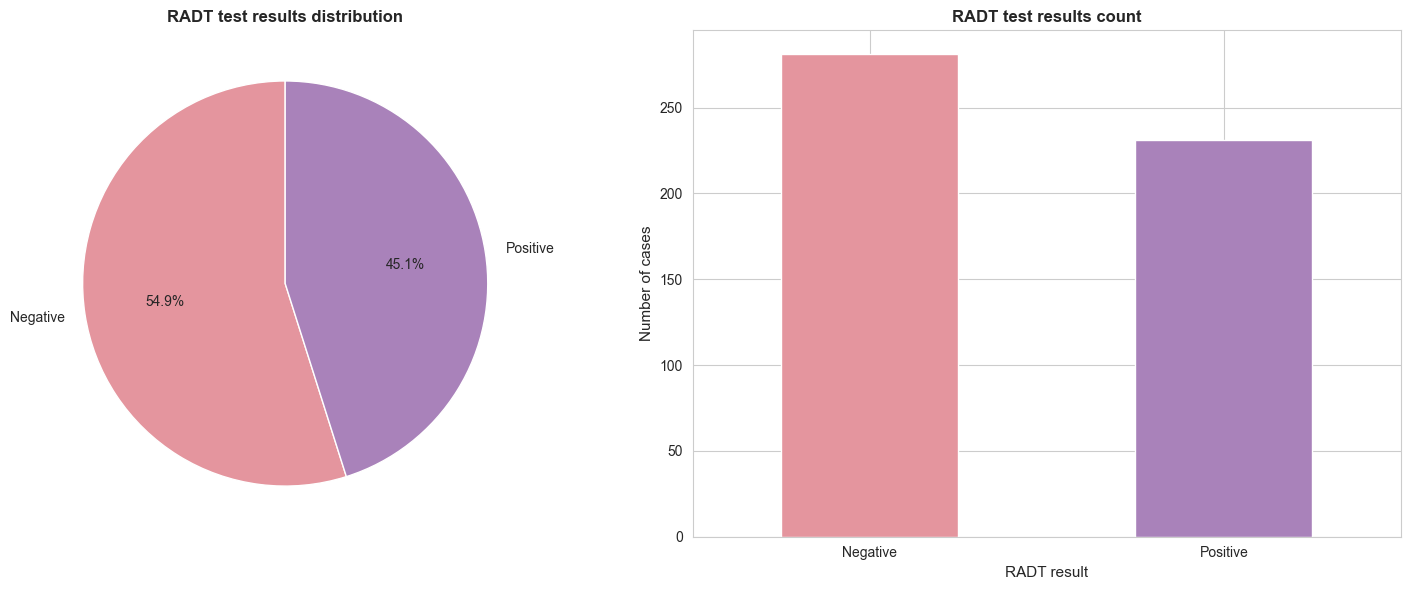

In [457]:
#visualizations of the data 
print ("\n" + "=" *55)
print (" Task 3: Data visualization".center (55))
print ("=" *55)

os.makedirs('figures', exist_ok=True)

print("\n3.1 Creating overall RADT distribution visualizations")

fig, axes = plt.subplots(1, 2, figsize= (15, 6))

#pie chart
radt_counts = ped_df['radt_positive'].value_counts()
colors= ['#E4959E', '#A982BA']
labels = ['Negative', 'Positive']
axes[0].pie(radt_counts, labels=labels, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[0].set_title('RADT test results distribution', fontsize=12, fontweight='bold')


#bar chart
radt_counts.plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_xlabel('RADT result')
axes[1].set_ylabel('Number of cases')
axes[1].set_title('RADT test results count', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(['Negative', 'Positive'], rotation=0)

plt.tight_layout()
plt.savefig('figures/ 01_radt-distribution.png', dpi=300, bbox_inches='tight')
plt.show()


3.2 Creating age group analysis visualizations


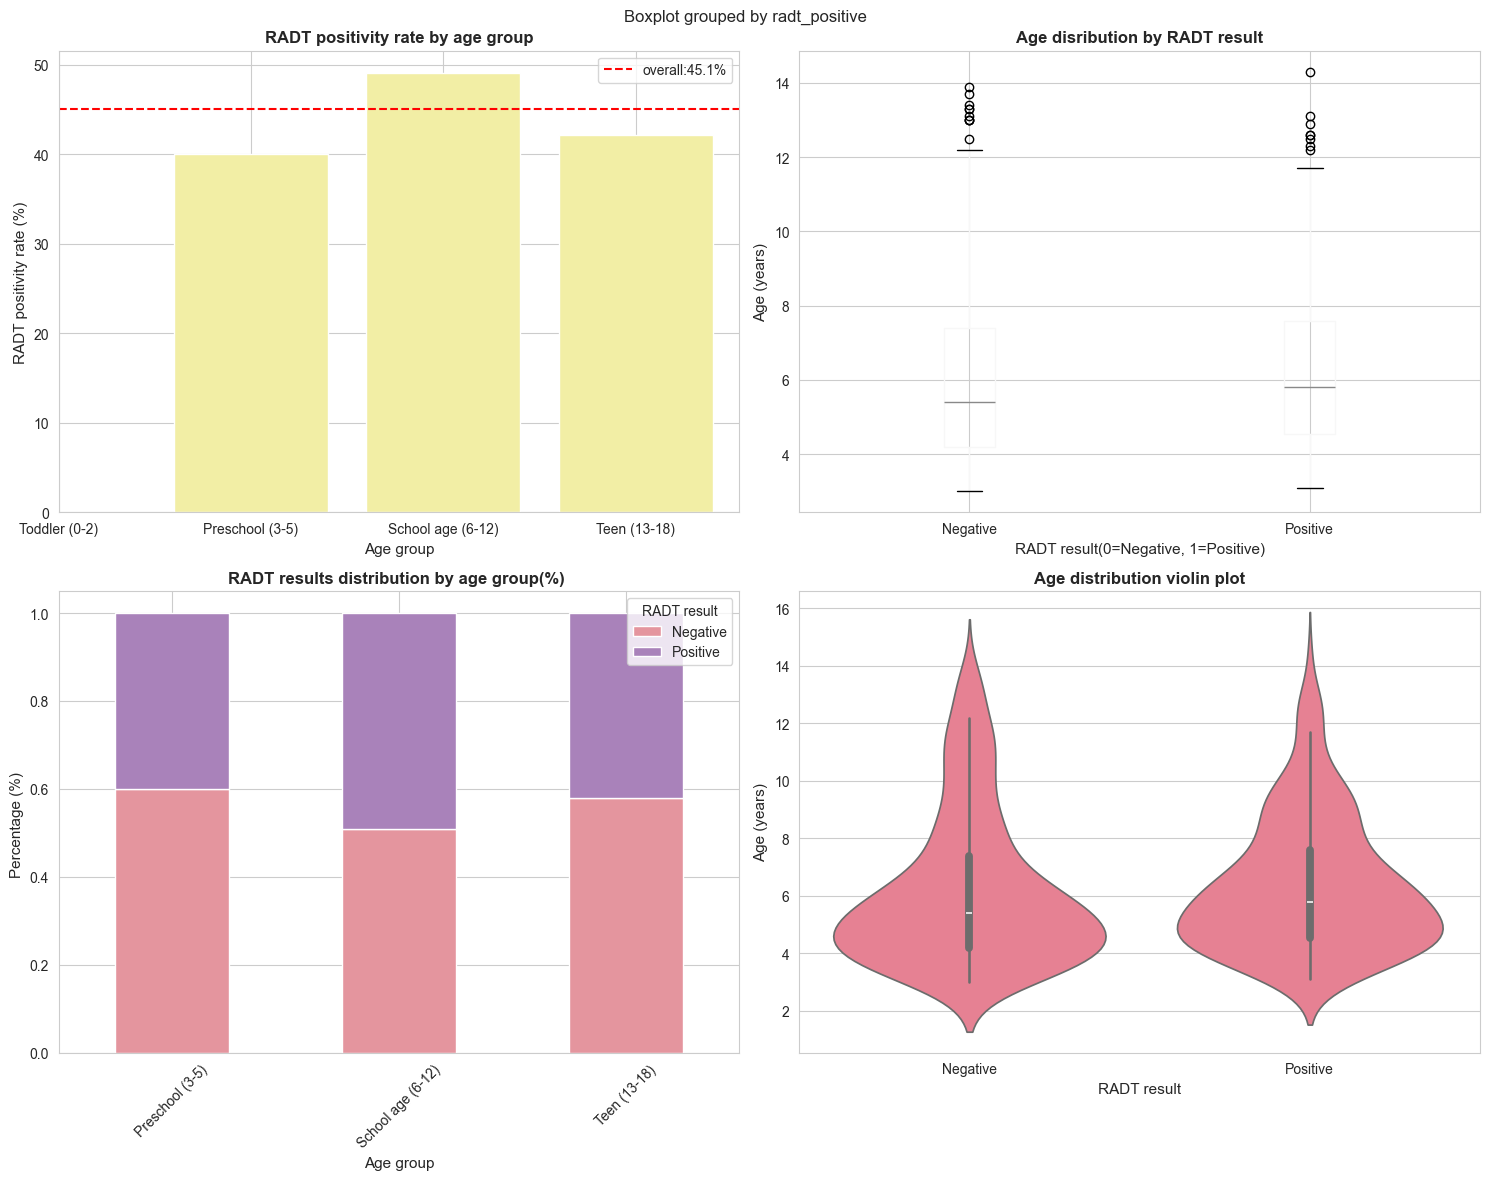

In [458]:
print("\n3.2 Creating age group analysis visualizations")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

#plot 1: RADT positivity rate by age group
age_positivity = age_radt_analysis['Positivity rate (%)']
axes[0, 0].bar(range(len(age_positivity)), age_positivity, color='#F2EEA5')
axes[0, 0].set_xlabel('Age group')
axes[0, 0].set_ylabel('RADT positivity rate (%)')
axes[0, 0].set_title('RADT positivity rate by age group', fontweight='bold')
axes[0, 0].set_xticks(range(len(age_positivity)))
axes[0, 0].set_xticklabels(age_positivity.index)
axes[0, 0].axhline(y=radt_percentage.get(1, 0), color='r',
                    linestyle='--', label=f'overall:{radt_percentage.get(1, 0):.1f}%')
axes[0, 0].legend()


#plot 2: age distribution by RADT result
ped_df.boxplot(column='age_y', by='radt_positive', ax=axes[0, 1])
axes[0, 1].set_xlabel('RADT result(0=Negative, 1=Positive)')
axes[0, 1].set_ylabel('Age (years)')
axes[0, 1].set_title('Age disribution by RADT result', fontweight='bold')
plt.sca(axes[0, 1])
plt.xticks([1, 2], ['Negative', 'Positive'])


#plot 3: stacked bar chart
contingency_table_pct = contingency_table.div(contingency_table.sum(axis=1), axis=0)
contingency_table_pct.plot(kind='bar', stacked=True, ax=axes[1, 0],
                           color=['#E4959E', '#A982BA'])
axes[1, 0].set_xlabel('Age group')
axes[1, 0].set_ylabel('Percentage (%) ')
axes[1, 0].set_title('RADT results distribution by age group(%) ', fontweight='bold')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].legend(['Negative', 'Positive'], title='RADT result')


#plot 4: violin plot
sns.violinplot(data=ped_df, x='radt_positive', y='age_y', ax=axes[1, 1])
axes[1, 1].set_xlabel('RADT result')
axes[1, 1].set_ylabel('Age (years)')
axes[1, 1].set_title('Age distribution violin plot', fontweight='bold')
axes[1, 1].set_xticklabels(['Negative', 'Positive'])

plt.tight_layout()
plt.savefig('figures/02_age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


3.3 Creating symptom correlation visualization


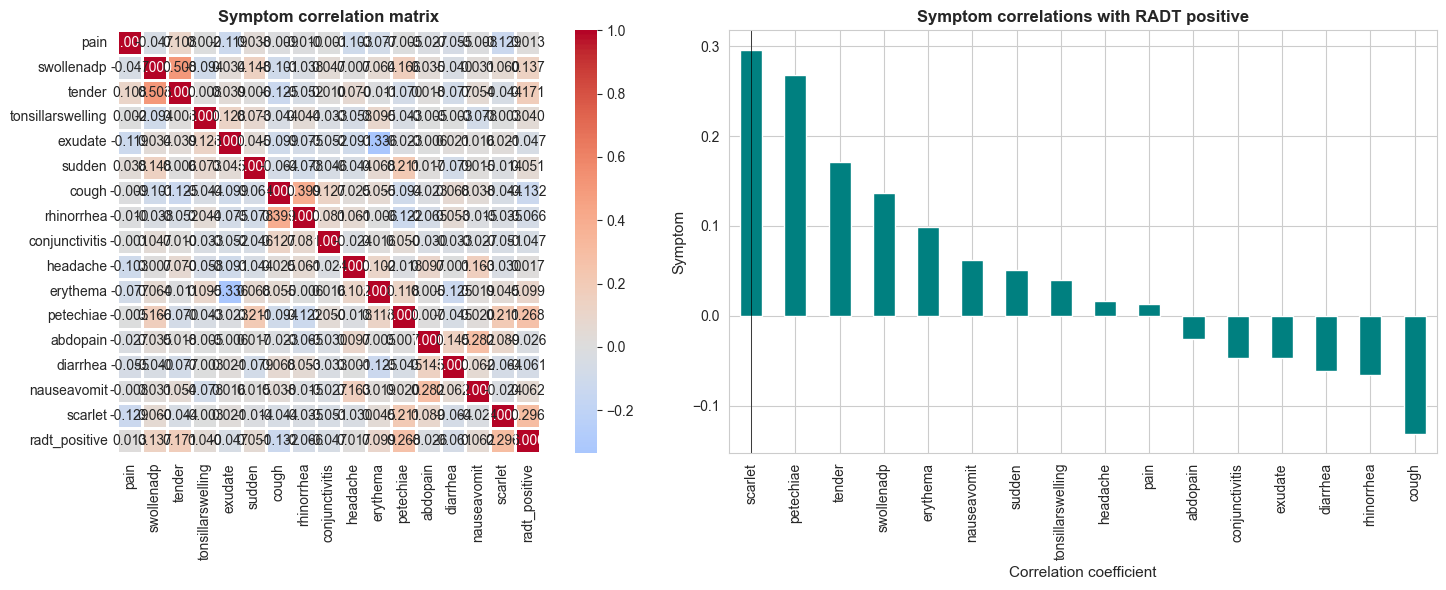

In [459]:
#3.3 symptom correlation visualizations 
print("\n3.3 Creating symptom correlation visualization")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#plot 5: 1- correlation heatmap 
correlation_matrix = ped_df[symptom_cols + ['radt_positive']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, ax=axes[0], square=True, linewidths=1)
axes[0].set_title('Symptom correlation matrix', fontsize=12, fontweight='bold')

#plot 6: 2- top correlations bar chart
correlations_sorted.plot(kind='bar', ax=axes[1], color='teal')
axes[1].set_xlabel('Correlation coefficient')
axes[1].set_ylabel('Symptom')
axes[1].set_title('Symptom correlations with RADT positive', fontsize=12, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-' , linewidth=0.5)

plt.tight_layout()
plt.savefig('figures/03_symptom_correlation.png', dpi=300, bbox_inches='tight')
plt.show()


3.4 Creating symptom prevalence visualizations


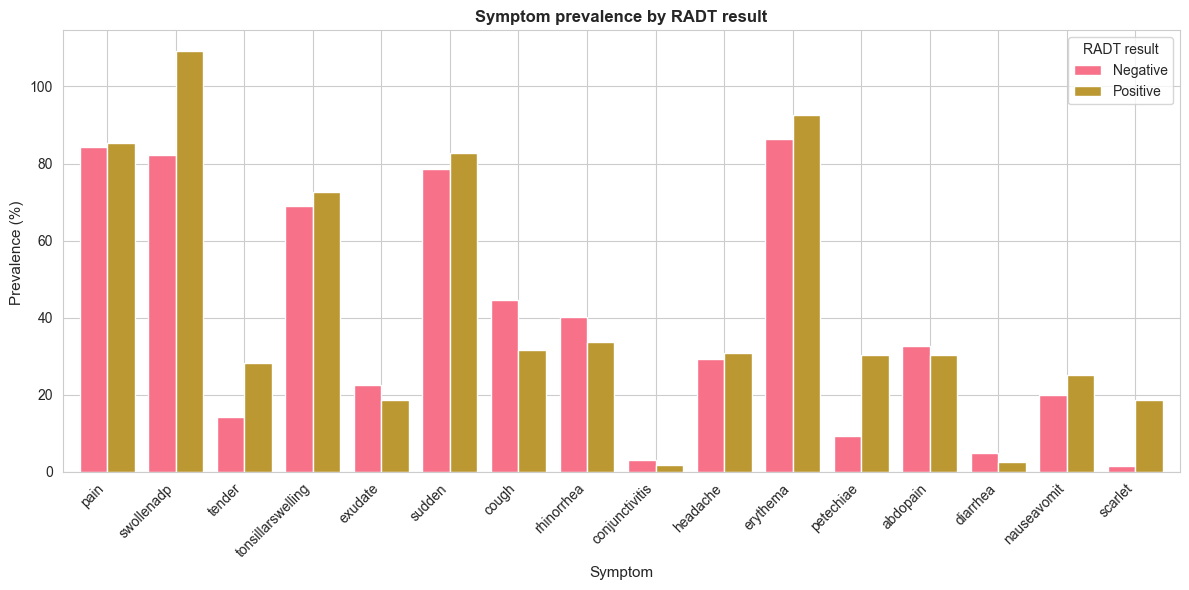

In [429]:
#3.4 symptom prevalence visualizations
print("\n3.4 Creating symptom prevalence visualizations")

fig, ax = plt.subplots(figsize=(12,6))

#plot 7
symptom_prev_T = symptom_prev.T
symptom_prev_T.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Symptom')
ax.set_ylabel('Prevalence (%) ')
ax.set_title('Symptom prevalence by RADT result', fontsize=12, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(['Negative', 'Positive'], title='RADT result')

plt.tight_layout()
plt.savefig('figures/04_symptom_prevalence.png', dpi=300, bbox_inches='tight')
plt.show()


3.5 Creating symptom count visualizations


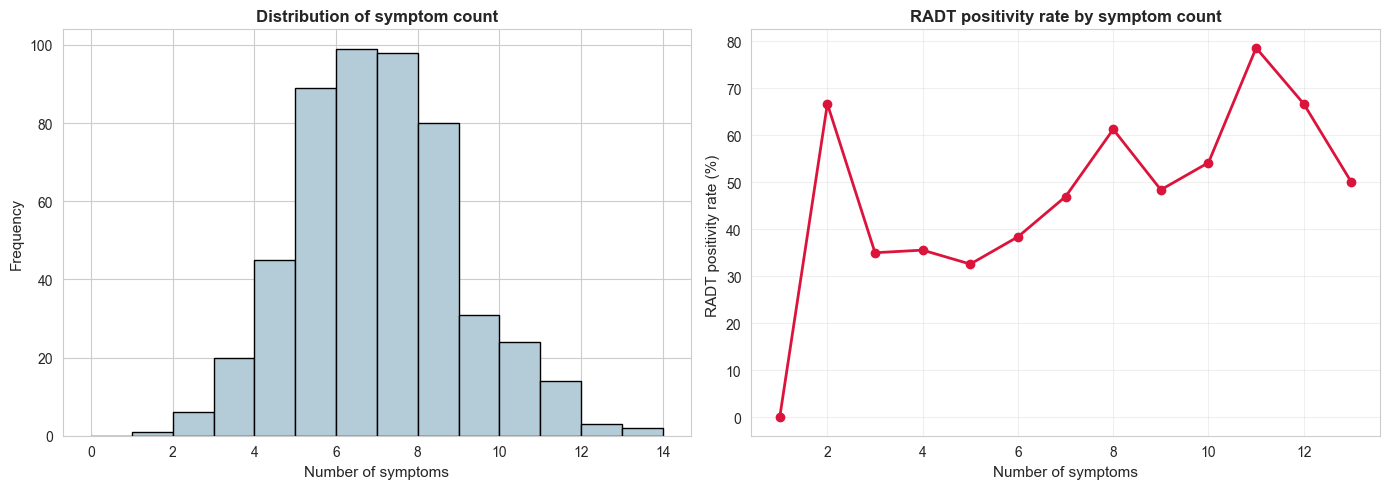

In [460]:
#3.5 symptom count analysis
print("\n3.5 Creating symptom count visualizations")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#plot 8: 1-symptom count distribution
ped_df['symptom_count'].hist(bins=range(0, int(ped_df['symptom_count'].max())+2),
                         ax=axes[0], color='#B4CBD8', edgecolor='black')
axes[0].set_xlabel('Number of symptoms')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of symptom count', fontweight='bold')

#plot 9: 2- positivity rate by symptom count
symptom_radt['positivity_rate'].plot(kind='line', marker='o', ax=axes[1],
                                     color='crimson', linewidth=2)
axes[1].set_xlabel('Number of symptoms')
axes[1].set_ylabel('RADT positivity rate (%) ')
axes[1].set_title('RADT positivity rate by symptom count', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/05_symptom_count.png', dpi=300, bbox_inches='tight')
plt.show()

In [461]:
print ("\n" + "=" *60)
print (" Task 4: Machine learning model development".center (60))
print ("=" *60)

#4.1 feature engineering
print("\n4.1 Feature engineering and preparation:")

feature_cols = symptom_cols + ['age_y', 'symptom_count']
x = ped_df[feature_cols].copy()
y = ped_df['radt_positive'].copy()

print(f"Features selected: {len(feature_cols)}")
print(f" {','.join(feature_cols)}")
print(f"\nTarget variable: radt_positive")
print(f" Positive cases: {y.sum()} ({y.sum() / len(y) *100:.2f}%)")
print(f" Negative cases: {len(y) - y.sum()} ({(len(y)-y.sum()) /len(y)*100:.2f}%)")


         Task 4: Machine learning model development         

4.1 Feature engineering and preparation:
Features selected: 18
 pain,swollenadp,tender,tonsillarswelling,exudate,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet,age_y,symptom_count

Target variable: radt_positive
 Positive cases: 231 (45.12%)
 Negative cases: 281 (54.88%)


In [432]:
print("\n4.2 Splitting data into training and testing sets:")
print ("-" *55)

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size = 0.2, random_state =RANDOM_STATE, stratify=y
)

print(f"Training set: {x_train.shape[0]} samples({x_train.shape[0]/ len(x)*100:.2f}%)")
print(f"Testing set: {x_test.shape[0]} samples({x_test.shape[0] / len(x)*100:.2f}%)")
print(f"\nClass distribution in training set:")
print(f" Positive: {y_train.sum()} ({y_train.sum()/ len(y_train)*100:.2f}%)")
print(f" Negative: {len(y_train) - y_train.sum()} ({(len(y_train)-y_train.sum()) / len(y_train)*100:.2f}%)")

#feature scaling 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


4.2 Splitting data into training and testing sets:
-------------------------------------------------------
Training set: 409 samples(79.88%)
Testing set: 103 samples(20.12%)

Class distribution in training set:
 Positive: 185 (45.23%)
 Negative: 224 (54.77%)


In [462]:
#4.3 model training 
print("\n4.3 Training multiple machine learning model:")
print ("-" *55)

#evalute the models
models = {
    'Logistic regression' : LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'Random forest' : RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'Gradient boosting' : GradientBoostingClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'Decision tree' : DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=10),
    'SVM' : SVC(random_state=RANDOM_STATE, probability=True),
    'Naive Bayes' : GaussianNB()
}

#train and evalute models
results = {}
print("\nTraining model")

for name, model in models.items():
    print(f" Training {name} ", end=' | ')

    if name in ['Logistic regression', 'SVM']:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
        y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]
    else: 
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_pred_proba = model.predict_proba(x_test)[:, 1]

        #calculate metrics 
        results[name] = {
            'model' : model,
            'y_pred' : y_pred,
            'y_pred_proba' : y_pred_proba,
            'accuracy' : accuracy_score(y_test, y_pred),
            'precision' : precision_score(y_test, y_pred),
            'recall' : recall_score(y_test, y_pred),
            'f1' : f1_score(y_test, y_pred),
            'roc_auc' : roc_auc_score(y_test, y_pred_proba)
        }

        print("✔")

#4.4 model comparison
print("\n4.4 Model performance comarsison: ")
print ("-" *55)

comparison_ped_df = pd.DataFrame({
    'Model' : list(results.keys()),
    'Accuracy' : [results[m]['accuracy'] for m in results.keys()],
    'Precision' : [results[m]['precision'] for m in results.keys()],
    'Recall (Sensitivity)' : [results[m]['recall'] for m in results.keys()],
    'F1-score' : [results[m]['f1'] for m in results.keys()],
    'Roc-auc' : [results[m]['roc_auc'] for m in results.keys()]
})

print("\nPerformance metrics (Test set):")
print(comparison_ped_df.round(4))

#identify the best model 
best_model_name = comparison_ped_df.loc[comparison_ped_df['F1-score'].idxmax(), 'Model']
print(f"\n Best performance model: {best_model_name}")
print(f" (based on F1-score)")

best_model = results[best_model_name]['model']
best_y_pred = results[best_model_name]['y_pred']
best_y_pred_proba = results[best_model_name]['y_pred_proba']


4.3 Training multiple machine learning model:
-------------------------------------------------------

Training model
 Training Logistic regression  |  Training Random forest  | ✔
 Training Gradient boosting  | ✔
 Training Decision tree  | ✔
 Training SVM  |  Training Naive Bayes  | ✔

4.4 Model performance comarsison: 
-------------------------------------------------------

Performance metrics (Test set):
               Model  Accuracy  Precision  Recall (Sensitivity)  F1-score  \
0      Random forest    0.6117     0.5789                0.4783    0.5238   
1  Gradient boosting    0.6602     0.6667                0.4783    0.5570   
2      Decision tree    0.5922     0.5556                0.4348    0.4878   
3        Naive Bayes    0.6602     0.6774                0.4565    0.5455   

   Roc-auc  
0   0.6772  
1   0.6289  
2   0.5873  
3   0.6447  

 Best performance model: Gradient boosting
 (based on F1-score)


In [463]:
#detailed analysis of the best model
print(f"\n4.5 Detailed analysis of {best_model_name}:")
print ("-" *55)

cm =confusion_matrix(y_test, best_y_pred)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion matrix:")
print(f" True negatives: {tn:4d} | False positive: {fp:4d}")
print(f" False negative: {fn:4d} | True positive: {tp:4d}")

#calculate specificity
specificity = tn / (tn+fp) if (tn+fp) > 0 else 0 
sensitivity = results[best_model_name]['recall']

print(f"\nClinically relevant metrics:")
print(f" Sensitivity (recall): {sensitivity:.4f} ({sensitivity*100:.1f}%)")
print(f" Ability to correctly identify GAS positive cases")
print(f" Specificity: {specificity:.4f} ({specificity*100:.1f}%)")
print(f" Ability to correctly identify GAS negative cases")

print(f"\nClinical interpretation:")
print(f" Out of 100 children with GAS pharyngitis:")
print(f" {int(sensitivity*100)} would be correctly identified (True positive)")
print(f" {int(1-sensitivity)*100} would be missed (False negative)")
print(f" Out of 100 children without GAS pharyngitis:")
print(f" {int(specificity*100)} would be correctly identified (True negative)")
print(f" {int(1-specificity)*100} would be incorrectly flagged (False positive)")

print ("\nDetailed classification report:")
print(classification_report(y_test, best_y_pred,
                            target_names = ['Negative', 'Positive']))


4.5 Detailed analysis of Gradient boosting:
-------------------------------------------------------

Confusion matrix:
 True negatives:   46 | False positive:   11
 False negative:   24 | True positive:   22

Clinically relevant metrics:
 Sensitivity (recall): 0.4783 (47.8%)
 Ability to correctly identify GAS positive cases
 Specificity: 0.8070 (80.7%)
 Ability to correctly identify GAS negative cases

Clinical interpretation:
 Out of 100 children with GAS pharyngitis:
 47 would be correctly identified (True positive)
 0 would be missed (False negative)
 Out of 100 children without GAS pharyngitis:
 80 would be correctly identified (True negative)
 0 would be incorrectly flagged (False positive)

Detailed classification report:
              precision    recall  f1-score   support

    Negative       0.66      0.81      0.72        57
    Positive       0.67      0.48      0.56        46

    accuracy                           0.66       103
   macro avg       0.66      0.64      0.64

In [464]:
#4.6 feature importance analysis ############
print("\n4.6 Feature importance analysis:")
print ("-" *55)

if hasattr (best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature' : feature_cols,
        'Importance' : best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nFeature importance ranking:")
    for idx, row in feature_importance.iterrows():
        print(f" {row['Feature']:30s}: {row['Importance']:.4f}")

elif hasattr(best_model, 'coef_'):
    feature_importance =pd.DataFrame({
        'Feature' : feature_cols,
        'Coefficient' : best_model.coef_[0]
    }).sort_values('Coefficient', ascending=False, key=abs)

    print("\nFeature coefficients (Logistic reggression):")
    for idx, row in feature_importance.iterrows():
        direction = " ↑ Increases" if row['Coefficient'] > 0 else " ↓ Decreases"
        print(f" {row['Feature']:30s}: {row['Cofficient']:7.4f} ({direction} GAS probability)")
        


4.6 Feature importance analysis:
-------------------------------------------------------

Feature importance ranking:
 age_y                         : 0.3139
 scarlet                       : 0.1946
 petechiae                     : 0.1304
 tender                        : 0.1004
 symptom_count                 : 0.0645
 cough                         : 0.0467
 pain                          : 0.0300
 conjunctivitis                : 0.0233
 swollenadp                    : 0.0186
 abdopain                      : 0.0170
 headache                      : 0.0148
 sudden                        : 0.0093
 nauseavomit                   : 0.0092
 rhinorrhea                    : 0.0083
 tonsillarswelling             : 0.0079
 diarrhea                      : 0.0065
 erythema                      : 0.0041
 exudate                       : 0.0005


In [436]:
#4.7 model optimization (Hyperparameter tuning)
print("\n4.7 Hyperparameter optimization:")
print ("-" *55)

#parameter grid for best model
if best_model_name =='Random forest':
    param_grid = {
        'n_estimators' : [ 100, 200, 300 ],
        'max_depth' : [5, 10, 15, None],
        'min_samples_split' : [2, 5, 10], 
        'min_samples_leaf' : [1, 2, 4]
    }
elif best_model_name == 'Logistic regression':
    param_grid = {
        'C' : [ 0.01, 0.1, 1, 10, 100],
        'penalty' : ['l1', 'l2'],
        'solver' : ['liblinear']
    }
elif best_model_name == 'Gradient boosting':
    param_grid ={
        'n_estimators' : [ 100, 200, 300 ],
        'learning_rate' : [0.01, 0.1, 0.2],
        'max_depth' : [3, 5, 7],
        'min_samples_split' : [2, 5, 10] 
    }
else: 
    param_grid = None


if param_grid:
    print(f"\nPerforming grid search for {best_model_name} ")
    print(f" Parameter combinations to test: {np.prod([len(v) for v in param_grid.values()])}")
    
    #which data to use
    if best_model_name in ['Logistic regression' , 'SVM']:
        grid_x_train = x_train_scaled
        grid_x_test = x_test_scaled
    else: 
        grid_x_train = x_train
        grid_x_test = x_test
        #initializ base model instance 
    if best_model_name == 'Random forest' :
        base_model = RandomForestClassifier(random_state=RANDOM_STATE)
    elif best_model_name == 'Logistic regression':
        base_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
    elif best_model_name == 'Gradient boosting':
        base_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
   
    #grid search
    grid_search= GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=5, scoring = 'f1',
        n_jobs=-1,
        verbose=0
    )
    grid_search.fit(grid_x_train, y_train)
    
    print(" Gride search complated")
    print(f"\nBest parameters found:")
    for param, value in grid_search.best_params_.items():
        print(f"{param}: {value}")
    # evalution of the optimized model
    optimized_model = grid_search.best_estimator_
    optimized_y_pred = optimized_model.predict(grid_x_test)
        
    print(f"\nOptimized model performance:")
    print(f" Accuracy: {accuracy_score(y_test, optimized_y_pred):.4f}")
    print(f" Precision: {precision_score(y_test, optimized_y_pred):.4f}")
    print(f" Recall: { recall_score(y_test, optimized_y_pred):.4f}")
    print(f" F1-score: {f1_score(y_test, optimized_y_pred):.4f}")
    
    #compare with the original
    print(f"\nImprovement over original model:")
    original_f1 = results[best_model_name]['f1']
    optimized_f1 =f1_score(y_test, optimized_y_pred)
    improvement = ((optimized_f1 - original_f1) / original_f1) * 100
    print(f" F1-score improvement: {improvement:+.2f}%")
    
    #update the best model if there is improvement
    if optimized_f1 > original_f1:
        best_model = optimized_model
        best_y_pred = optimized_y_predprint(" Useing optimized model for visualizations")        


4.7 Hyperparameter optimization:
-------------------------------------------------------

Performing grid search for Gradient boosting 
 Parameter combinations to test: 81
 Gride search complated

Best parameters found:
learning_rate: 0.01
max_depth: 3
min_samples_split: 10
n_estimators: 100

Optimized model performance:
 Accuracy: 0.6408
 Precision: 0.6452
 Recall: 0.4348
 F1-score: 0.5195

Improvement over original model:
 F1-score improvement: -6.73%



4.8 Creating model visualization:
-------------------------------------------------------


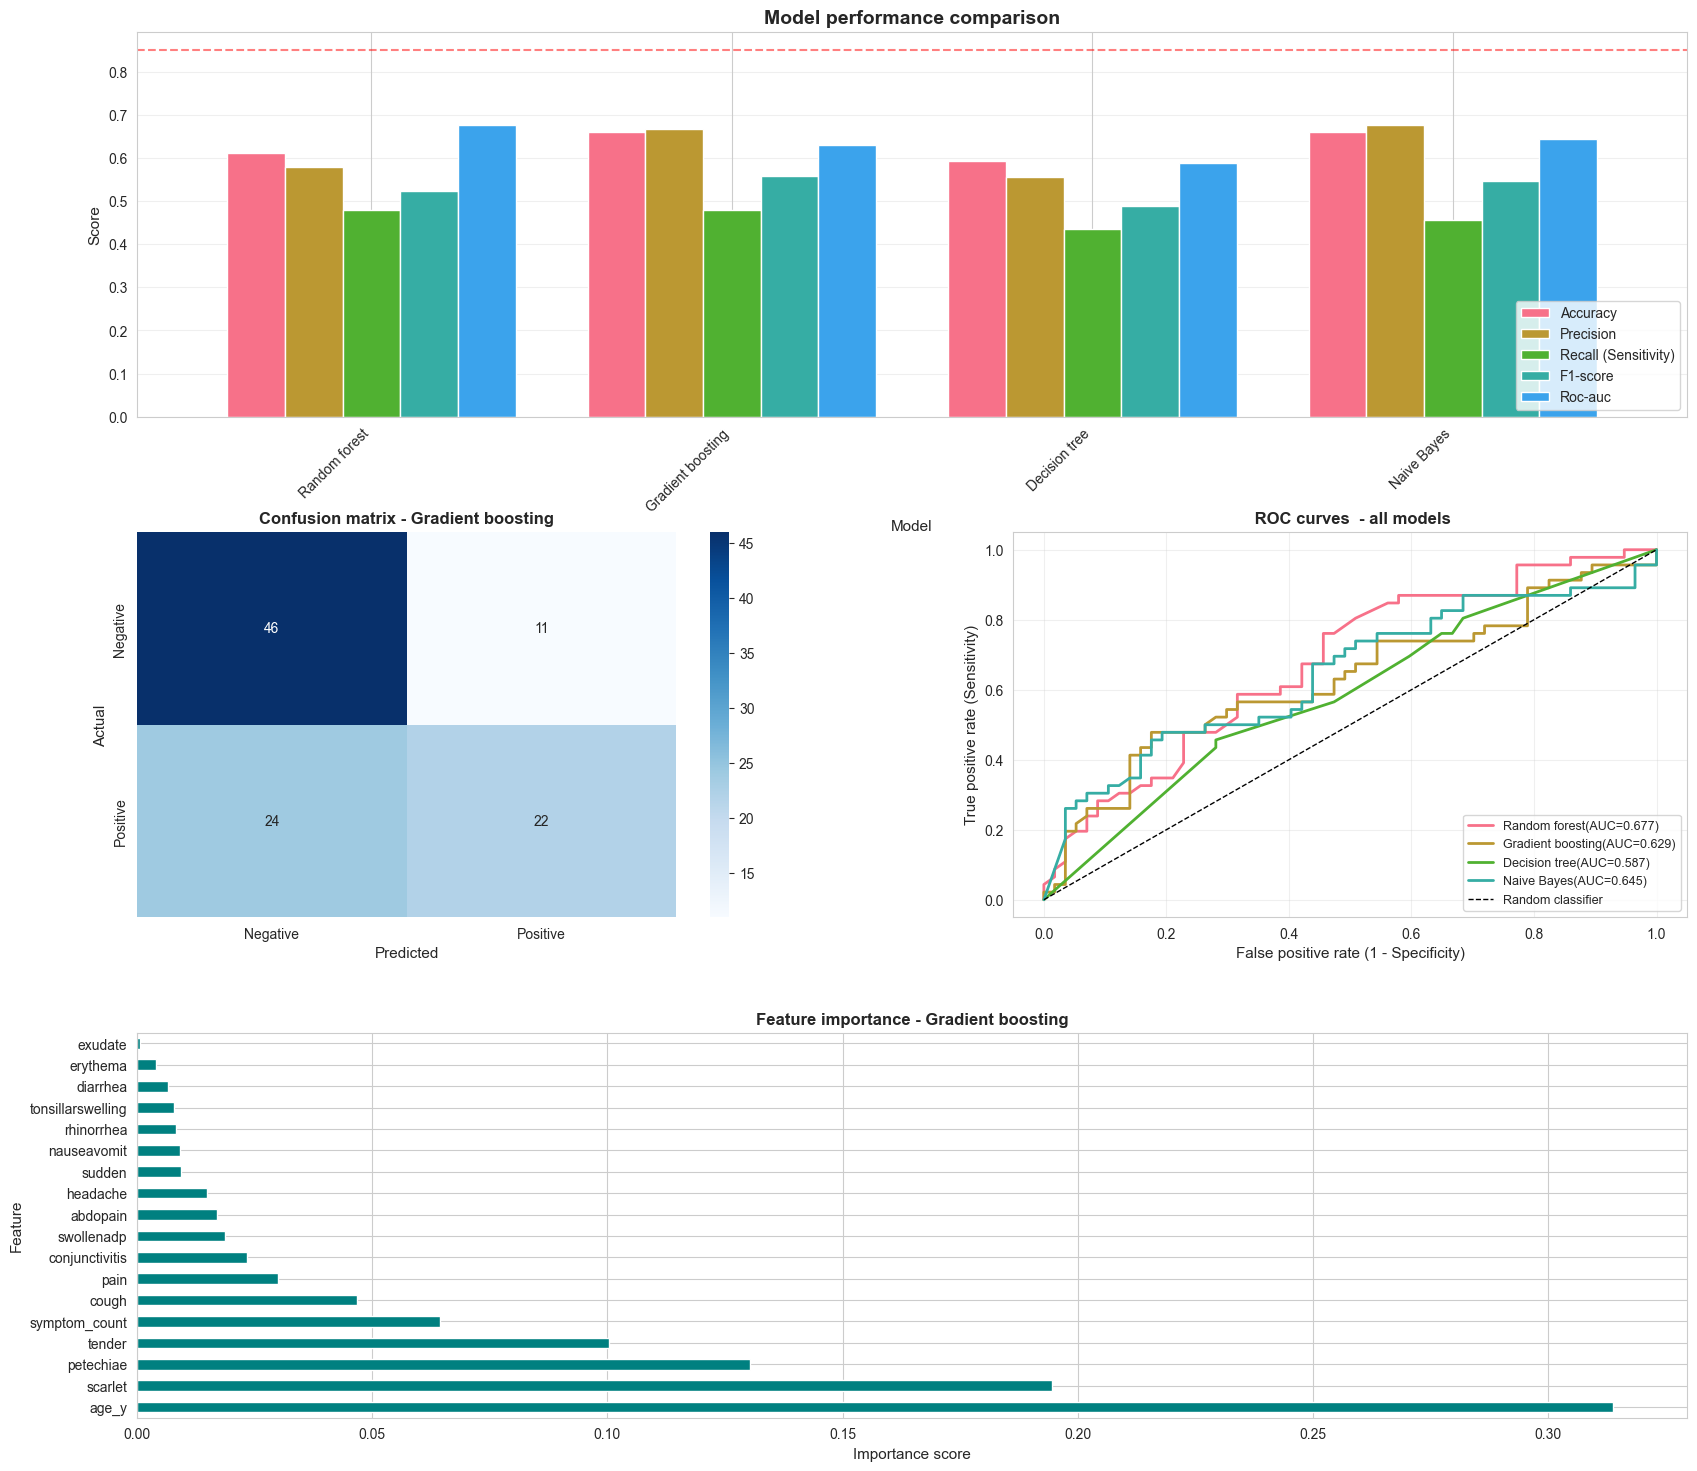

In [465]:
# Model visualization 
print("\n4.8 Creating model visualization:")
print ("-" *55)

fig = plt.figure(figsize=(20, 18))
gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.3)

#plot 10: 1- model comarison bar chart
ax1 = fig.add_subplot(gs[0, :])
comparison_ped_df_plot = comparison_ped_df.set_index('Model')
comparison_ped_df_plot.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_ylabel('Score')
ax1.set_title('Model performance comparison', fontsize=14, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='lower right')
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=0.85, color='r', linestyle='--', alpha=0.5, label='Clinical threshold')


#plot 11: 2- confusion matrix

ax2 = fig.add_subplot(gs[1, 0])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels =['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
ax2.set_ylabel('Actual')
ax2.set_xlabel('Predicted')
ax2.set_title(f'Confusion matrix - {best_model_name}', fontweight='bold')

#plot 12: 3- roc curve
ax3 = fig.add_subplot(gs[1, 1])
for name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    auc_score = results[name]['roc_auc']
    ax3.plot(fpr, tpr, label= f'{name}(AUC={auc_score:.3f})', linewidth=2)
ax3.plot([0, 1], [0, 1], 'k--', label='Random classifier', linewidth=1)
ax3.set_xlabel('False positive rate (1 - Specificity)')
ax3.set_ylabel('True positive rate (Sensitivity)')
ax3.set_title(' ROC curves  - all models', fontweight='bold')
ax3.legend(loc='lower right', fontsize=9)
ax3.grid(alpha=0.3)

#  plot 13: 4- feature importance
ax4= fig.add_subplot(gs[2, :])
if hasattr(best_model, 'feature_importances_'):
    feature_importance.plot(x='Feature', y='Importance', kind='barh',
                            ax=ax4, color='teal', legend=False)
    ax4.set_xlabel('Importance score')
    ax4.set_ylabel('Feature')
    ax4.set_title(f'Feature importance - {best_model_name}', fontweight='bold')
elif hasattr(best_model, 'coef_'):
    feature_importance['Abs_coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance.sort_values('Abs_coefficient', ascending=True).plot(
        x='Feature', y='Coefficient', kind='barh', ax=ax4, color='teal', legend=False
    )
    ax4.set_xlabel('Coefficient value')
    ax4.set_ylabel('Feature')
    ax4.set_title(f'feature coefficients - {best_model_name}' , fontweight='bold')
    ax4.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.savefig('figures/06_ml_model_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [466]:
#4.9 cross-validation
print("\n4.9 Cross-validation analysis:")
print ("-" *55)

# perform 5-fold cross-validation on best model
cv_scores =cross_val_score(best_model, x, y, cv=5, scoring='f1')

print(f"\n5-Fold cross-validation results:")
print(f" Fold scores: {[f'{score:.4f}' for score in cv_scores]}")
print(f" Mean f1-score: {cv_scores.mean():.4f}  ± {cv_scores.std():.4f}")
print(f" This indicates {'consistent' if cv_scores.std() < 0.05 else 'variable'} model performance")


4.9 Cross-validation analysis:
-------------------------------------------------------

5-Fold cross-validation results:
 Fold scores: ['0.5476', '0.5385', '0.6882', '0.6173', '0.4810']
 Mean f1-score: 0.5745  ± 0.0714
 This indicates variable model performance


In [467]:
#summary 
print ("\n" + "=" *55)
print (" Final summary of project analysis ".center (55))
print ("=" *55)

print(f"\nDataset:")
print(f" Total records: {len(ped_df)}")
print(f" GAS prevalence: {(ped_df['radt_positive'].sum()/len(ped_df)*100):.2f}%")

print(f"\nThe key findings:")
print(f" 1. Most predictive age group: {age_radt_analysis['Positivity rate (%)'].idxmax()}")
print(f" 2. Most correlated symptom: {correlations_sorted.index[0]}")
print(f" 3. Best ML model: {best_model_name}")
print(f" 4. Model sensitivity: {sensitivity:.1%}")
print(f" 5. Model specificity: {specificity:.1%}")

print(f"\nClinical implications:")
if sensitivity >= 0.85 and specificity >= 0.90:
    print(f" Model meets clinical threcholds for RADT prediction")
    print(f" could supportn clinical decision-making for selective testing")
elif sensitivity >= 0.85:
    print(" Good sensitivity but specificity could be improved")
    print(" May lead to over testing , but won't miss GAS cases")
elif specificity >= 0.90:
    print(" Good specificity but sensitivity could be improved")
    print(" Risk of missing some GAS cases, needs caution")
else:
    print(" Both metrics need improvement for clinical use")
    print(" More data or feature engineering my be needed")

print(f"\nRecommendations:")
print(f" - Consider implementing {best_model_name} in clinical decision support")
print(f" - Focus on key symptoms: {','.join(correlations_sorted.head(3).index)}")
print(f" - Target high-risk age groups for selective RADT testing")
print(f" - Validate model on external dataset before deployment")





           Final summary of project analysis           

Dataset:
 Total records: 512
 GAS prevalence: 45.12%

The key findings:
 1. Most predictive age group: School age (6-12)
 2. Most correlated symptom: scarlet
 3. Best ML model: Gradient boosting
 4. Model sensitivity: 47.8%
 5. Model specificity: 80.7%

Clinical implications:
 Both metrics need improvement for clinical use
 More data or feature engineering my be needed

Recommendations:
 - Consider implementing Gradient boosting in clinical decision support
 - Focus on key symptoms: scarlet,petechiae,tender
 - Target high-risk age groups for selective RADT testing
 - Validate model on external dataset before deployment


In [468]:
#summary report

summary = f"""
D540- Project analysis summary
{'=' *60}

Project: Pediatric pharyngitis RADT prediction
Date {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

Dataset characteristics:
- Total records: {len(ped_df)}
- GAS prevalence: {(ped_df['radt_positive'].sum()/len(ped_df)*100):.1f}%
- Age range: {ped_df['age_y'].min():.0f}-{ped_df['age_y'].max():.0f} years
- Features analyzed: {len(feature_cols)}

Key findings: 
1- Age analysis:
    - Highest risk age group: {age_radt_analysis ['Positivity rate (%)'].idxmax()}
    - Chi-square p-value: {p_value:.4f}

2- Symptoms analysis:
    - Top correlated symptom: {correlations_sorted.index[0]} (r={correlations_sorted.iloc[0]:.3f})
    - Average symptoms per patient: {ped_df['symptom_count'].mean():.1f}

3- Machine learning results: 
    - Best model: {best_model_name}
    - Test accuracy: {results[best_model_name]['accuracy']:.4f}
    - Sensitivity: {sensitivity:.4f}({sensitivity*100:.1f}%)
    - Specificity: {specificity:.4f}({specificity*100:.1f}%)
    - F1-score: {results[best_model_name]['f1']:.4f}
    - ROC-AUC: {results[best_model_name]['roc_auc']:.4f}

Clinical implications:
- Model {'Meets' if (sensitivity >= 0.85 and specificity >= 0.90) else 'dose not meet'} clinical performance thresholds 
- Sensitivity {'adequate' if sensitivity >= 0.85 else 'needs improvement'} for avoiding missed GAS cases 
- Specificity {'adequate' if specificity >= 0.90 else 'needs improvement'} for reducing unnecessary testing

Recommendations:
1- implement {best_model_name} for selective RADT testing 
2- Prioritize key symptoms in clinical assessment 
3- Target high risk age groups for testing
4- validate on external dataset before clinical deployment

{'=' *60}
"""

with open('figures/project_summary.txt', 'w') as f:
    f.write(summary)
    
print(summary)



D540- Project analysis summary

Project: Pediatric pharyngitis RADT prediction
Date 2025-11-30 22:13:53

Dataset characteristics:
- Total records: 512
- GAS prevalence: 45.1%
- Age range: 3-14 years
- Features analyzed: 18

Key findings: 
1- Age analysis:
    - Highest risk age group: School age (6-12)
    - Chi-square p-value: 0.1276

2- Symptoms analysis:
    - Top correlated symptom: scarlet (r=0.296)
    - Average symptoms per patient: 6.5

3- Machine learning results: 
    - Best model: Gradient boosting
    - Test accuracy: 0.6602
    - Sensitivity: 0.4783(47.8%)
    - Specificity: 0.8070(80.7%)
    - F1-score: 0.5570
    - ROC-AUC: 0.6289

Clinical implications:
- Model dose not meet clinical performance thresholds 
- Sensitivity needs improvement for avoiding missed GAS cases 
- Specificity needs improvement for reducing unnecessary testing

Recommendations:
1- implement Gradient boosting for selective RADT testing 
2- Prioritize key symptoms in clinical assessment 
3- Target 